In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models


In [ ]:
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"

In [ ]:
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['gender'] = df['gender'].map({"Female":0, "Male":1})
df['Churn'] = df['Churn'].map({"No":0, "Yes":1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
features = df.columns
features = features.drop(['customerID','Churn'])
features

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
for col in features:
  if df[col].dtype == 'object':
    df[col] = pd.factorize(df[col])[0]

features = [f for f in features if f in df.columns]
x = df[features]
y = df['Churn']

In [ ]:
rf = RandomForestClassifier(n_estimators=280, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select = 10)
rfe.fit(x,y)

RFE(estimator=RandomForestClassifier(n_estimators=280, random_state=42),
    n_features_to_select=10)

In [ ]:
selected_features = x.columns[rfe.support_]
selected_features
rf.fit(x,y)

RandomForestClassifier(n_estimators=280, random_state=42)

In [ ]:
X = df[selected_features]
Y = df['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import pickle as pk
with open('scaler.pkl', 'wb') as f:
  pk.dump(scaler, f)

In [ ]:
def create_model(hp=False):
  if hp:
    model = models.Sequential()
    model.add(layers.Dense(units=hp.Choice('unit_1', values=[32,64,128]), activation='relu',input_shape = (X_train.shape[1],)))

    if hp.Boolean('second_layer'):
      model.add(layers.Dense(units=hp.Choice('unit_2', values=[16,32]), activation='relu'))

    model.add(layers.Dense(1,activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  else :
    model = models.Sequential()
    model.add(layers.Dense(64,activation = 'relu',input_shape = (X_train.shape[1],)))
    model.add(layers.Dense(32,activation = 'relu'))
    model.add(layers.Dense(16,activation = 'relu'))
    model.add(layers.Dense(8,activation = 'relu'))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
initial_model= create_model()
history = initial_model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7266 - loss: 0.5246 - val_accuracy: 0.8116 - val_loss: 0.4211
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.4323 - val_accuracy: 0.8000 - val_loss: 0.4222
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7916 - loss: 0.4368 - val_accuracy: 0.8080 - val_loss: 0.4010
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7910 - loss: 0.4296 - val_accuracy: 0.8018 - val_loss: 0.4015
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4220 - val_accuracy: 0.8009 - val_loss: 0.4009
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.4271 - val_accuracy: 0.8116 - val_loss: 0.3981
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8091 - loss: 0.4035 - val_accuracy: 0.8009 - val_loss: 0.3971
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7942 - loss: 0.4277 - val_accuracy: 0.8124 - val_

Text(0, 0.5, 'Loss')

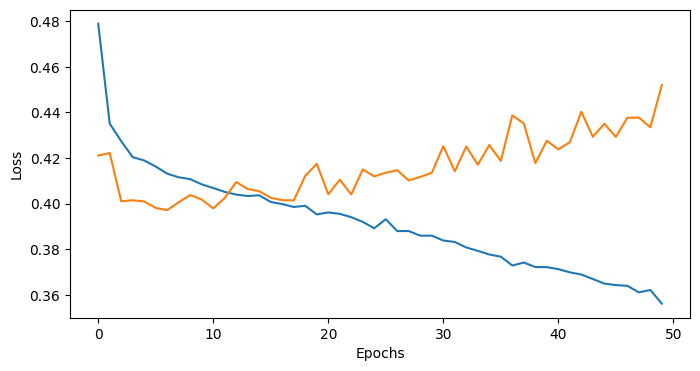

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

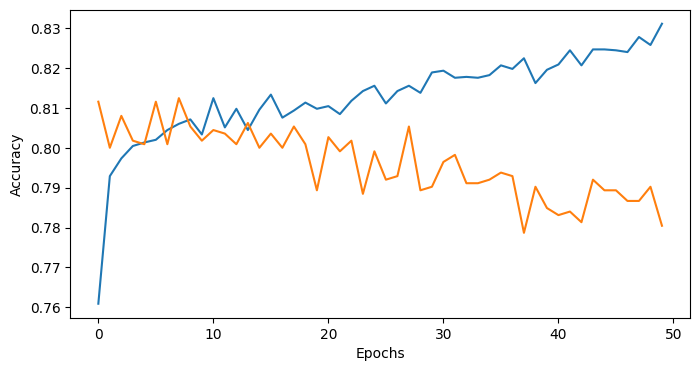

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
tuner = kt.RandomSearch(create_model,objective='val_accuracy', max_trials=5 , directory = 'keras_tuning', project_name = "churn_prediction")

In [ ]:
import tensorflow as tf
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(
    X_train,
    Y_train,
    epochs=50,
    validation_split=0.2,
)

Trial 5 Complete [00h 00m 18s]
val_accuracy: 0.8177777528762817

Best val_accuracy So Far: 0.8204444646835327
Total elapsed time: 00h 01m 34s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
for p in best_hps.values:
  print(f'{p}: {best_hps.get(p)}')

unit_1: 64
second_layer: False
unit_2: 32


In [ ]:
best_model = tuner.hypermodel.build(best_hps)
best_history = best_model.fit(X_train, Y_train, epochs=50,batch_size = 32, validation_split=0.2)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6560 - loss: 0.5957 - val_accuracy: 0.8009 - val_loss: 0.4332
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7722 - loss: 0.4582 - val_accuracy: 0.8062 - val_loss: 0.4179
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7913 - loss: 0.4386 - val_accuracy: 0.8071 - val_loss: 0.4094
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7940 - loss: 0.4285 - val_accuracy: 0.8071 - val_loss: 0.4065
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7999 - loss: 0.4133 - val_accuracy: 0.8116 - val_loss: 0.4048
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8034 - loss: 0.4196 - val_accuracy: 0.8124 - val_loss: 0.4005
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8010 - loss: 0.4199 - val_accuracy: 0.8133 - val_loss: 0.4001
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8009 - loss: 0.4217 - val_accuracy: 0.

Text(0, 0.5, 'Loss')

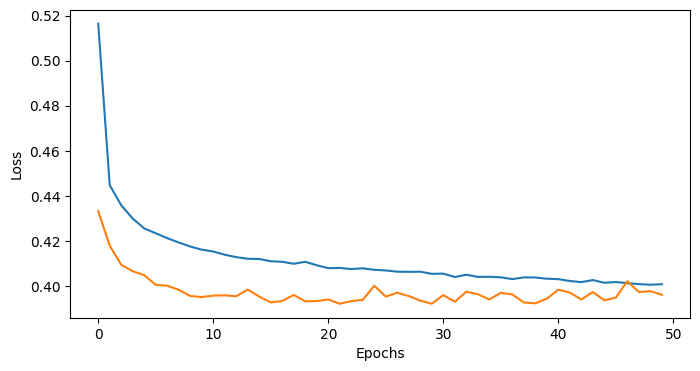

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

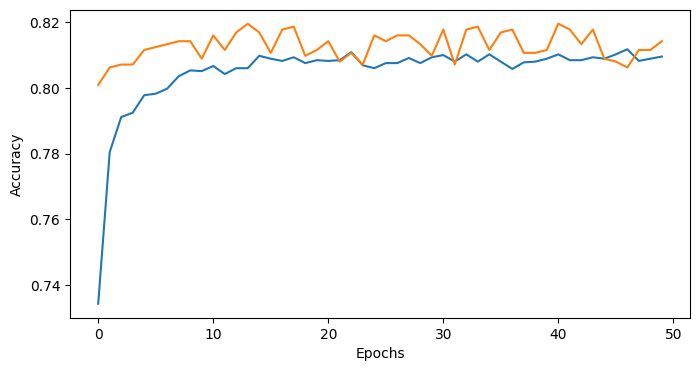

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
best_model.save('best_model.h5')
with open('selected_features.pkl', 'wb') as f:
  pk.dump(selected_features, f)

In [ ]:
def load_model():
  model = tf.keras.models.load_model('best_model.h5')

  with open('scaler.pkl', 'rb') as f:
    scaler = pk.load(f)

  with open('selected_features.pkl', 'rb') as f:
    selected_features = pk.load(f)

  return model,scaler,selected_features

In [ ]:
def predict(*args):
  model,scaler,selected_features = load_model()
  input = pd.DataFrame([args], columns=selected_features)
  input = scaler.transform(input)
  prediction = model.predict(input)[0][0]
  prob = float(prediction)
  churn_status = "Churn" if prediction > 0.5 else "No Churn"
  return {
      "churn_status": churn_status,
      "probability": prob
  }


In [ ]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,5575-GNVDE,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0


In [ ]:
selected_features

Index(['gender', 'tenure', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [ ]:
predict(1,34,1,1,1,0,1,1,56.96,1889.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


{'churn_status': 'No Churn', 'probability': 0.059197377413511276}